In [1]:
from casadi import *
import numpy as np
import control
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Tutorial 02: Exploring MPC
In this tutorial, we will look at how differing the parameters of MPC changes it's performance.
First, we will import some of the functions from the previous tutorial.
Note that this import will run the previous tutorial notebook, which may take some time.
We will also define a plotting tool to more easily compare solutions.

In [11]:
from ipynb.fs.full.tut01_what_is_mpc import inverted_pendulum, setup_optim, solve_optim, unconstrainted_mpc, LQR

def plot_comparisons(trajectories, Q, R):
    """
    Plot trajectores
    args:
        trajectories [list] : List of dictionaries with each dict {x : x_data, u : input_data, name : 'name'}
    """
    n_traj = len(trajectories)
    
    for i in range(n_traj):
        x = trajectories[i]['x']
        u = trajectories[i]['u']
        c = trajectories[i]['stage_costs']
        N_iter = trajectories[i]['N']
        name = trajectories[i]['name']
        cost = np.trace(x @ Q @ x.transpose()) + np.trace(u @ R @ u.transpose())
        
        print(name + " Total cost: %s" %cost)

        nx = x.shape[1]
        nu = u.shape[1]
        subplot_id = (nx+nu+1)*100+11
        for j in range(nx):
            plt.subplot(subplot_id + j)
            n1 = np.shape(x)[0]
            t1 = np.arange(n1)*dt
            plt.plot(t1, x[:,0], label=name)
            plt.ylabel('x%s' %j)
            
        for j in range(nu):
            plt.subplot(subplot_id + nx + j)
            n1 = np.shape(u)[0]
            t1 = np.arange(n1)*dt
            plt.plot(t1, u[:,0], label=name)
            plt.ylabel('u%s' %j) 

        plt.subplot(subplot_id + nx + nu)
        n1 = np.shape(c)[0]
        plt.plot(c[:]/N_iter, label=name)
        plt.ylabel('Avg Stage Costs') 
    plt.legend(loc=1)
    plt.show()

    
np.random.seed(123412)
F, dt = inverted_pendulum()


## Comparing Time Horizons

Let us first compare a couple different time horizons. $N=2$, $N=10$, and $N=50$, at an initial condition reasonably close to the goal location. This steip will take some time.

In [25]:
# Initial conditions
x0 = np.array([0.1, 0])

# define goal
xg = np.zeros(2)

# Gain matrices
Q = np.eye(2)*10
R = np.eye(1)

trajectories = []

tol=1e-6
MAX_STEPS=500

#N = 2
#print("Starting N=%s"%N)
#name = "N=%s"%N
#x, u, c = unconstrainted_mpc(F, N, x0, xg, Q, R, dt, tol=tol, MAX_STEPS=MAX_STEPS)
#trajectories.append({'x' : x, 'u' : u, 'stage_costs' : c, 'name' : name, 'N' : N})
#print("Done N=%s"%N)

N = 10
print("Starting N=%s"%N)
name = "N=%s"%N
x, u, c = unconstrainted_mpc(F, N, x0, xg, Q, R, dt, tol=tol, MAX_STEPS=MAX_STEPS)
trajectories.append({'x' : x, 'u' : u, 'stage_costs' : c, 'name' : name, 'N' : N})
print("Done N=%s"%N)

N = 100
print("Starting N=%s"%N)
name = "N=%s"%N
x, u, c = unconstrainted_mpc(F, N, x0, xg, Q, R, dt, tol=tol, MAX_STEPS=MAX_STEPS, print_level=2)
trajectories.append({'x' : x, 'u' : u, 'stage_costs' : c, 'name' : name, 'N' : N})
print("Done N=%s"%N)

Starting N=10
Done N=10
Starting N=100
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      802
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      600

Total number of variables............................:      302
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      202
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d

   1  1.8002050e+01 2.40e-05 1.35e-02  -2.5 3.95e-01    -  1.00e+00 1.00e+00h  1
   2  1.7989763e+01 3.36e-10 5.81e-09  -3.8 4.42e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.7989763452408621e+01    1.7989763452408621e+01
Dual infeasibility......:   5.8056961460550838e-09    5.8056961460550838e-09
Constraint violation....:   3.3613779815144795e-10    3.3613779815144795e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.8056961460550838e-09    5.8056961460550838e-09


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  1.7658820e+01 2.27e-05 1.34e-02  -2.5 3.93e-01    -  1.00e+00 1.00e+00h  1
   2  1.7647494e+01 2.98e-10 4.38e-09  -3.8 3.98e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.7647493797226367e+01    1.7647493797226367e+01
Dual infeasibility......:   4.3838552787889284e-09    4.3838552787889284e-09
Constraint violation....:   2.9766858422597409e-10    2.9766858422597409e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.3838552787889284e-09    4.3838552787889284e-09


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  1.7109676e+01 2.09e-05 1.33e-02  -2.5 3.91e-01    -  1.00e+00 1.00e+00h  1
   2  1.7099587e+01 2.58e-10 3.23e-09  -3.8 3.52e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.7099587442757578e+01    1.7099587442757578e+01
Dual infeasibility......:   3.2306322061970150e-09    3.2306322061970150e-09
Constraint violation....:   2.5814238246990584e-10    2.5814238246990584e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.2306322061970150e-09    3.2306322061970150e-09


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  1.6361071e+01 1.89e-05 1.32e-02  -2.5 3.89e-01    -  1.00e+00 1.00e+00h  1
   2  1.6352332e+01 2.10e-10 2.34e-09  -3.8 3.09e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.6352331855831224e+01    1.6352331855831224e+01
Dual infeasibility......:   2.3370010371337457e-09    2.3370010371337457e-09
Constraint violation....:   2.0954162016639799e-10    2.0954162016639799e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.3370010371337457e-09    2.3370010371337457e-09


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  1.5452748e+01 1.68e-05 1.31e-02  -2.5 3.88e-01    -  1.00e+00 1.00e+00h  1
   2  1.5445346e+01 3.53e-09 1.65e-09  -3.8 2.69e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.5445345807676535e+01    1.5445345807676535e+01
Dual infeasibility......:   1.6459211771291393e-09    1.6459211771291393e-09
Constraint violation....:   3.5345084706261964e-09    3.5345084706261964e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.5345084706261964e-09    3.5345084706261964e-09


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  | 236.00us ( 78.67us) 237.39us ( 79.13us)         3
       nlp_g  |  14.46ms (  4.82ms)  14.53ms (  4.84ms)         3
    nlp_grad  |  22.10ms ( 22.10ms)  22.28ms ( 22.28ms)         1
  nlp_grad_f  | 429.00us (107.25us) 428.23us (107.06us)         4
  nlp_hess_l  | 117.58ms ( 58.79ms) 118.01ms ( 59.00ms)         2
   nlp_jac_g  |  81.62ms ( 20.40ms)  82.17ms ( 20.54ms)         4
       total  | 245.39ms (245.39ms) 247.23ms (247.23ms)         1

Step: 18
State: 0.085  -0.129,  Input: 0.367, Stage Cost: 14.428
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      802
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      600

Total number of variables............................:      302
      

   1  1.2988114e+01 1.22e-05 1.15e-02  -2.5 3.83e-01    -  1.00e+00 1.00e+00h  1
   2  1.2983404e+01 1.12e-10 7.07e-10  -3.8 1.88e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.2983404425117687e+01    1.2983404425117687e+01
Dual infeasibility......:   7.0695360676609198e-10    7.0695360676609198e-10
Constraint violation....:   1.1205172900652371e-10    1.1205172900652371e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.0695360676609198e-10    7.0695360676609198e-10


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  1.1888297e+01 1.05e-05 1.04e-02  -2.5 3.80e-01    -  1.00e+00 1.00e+00h  1
   2  1.1884498e+01 9.50e-11 4.84e-10  -3.8 1.60e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.1884498087641484e+01    1.1884498087641484e+01
Dual infeasibility......:   4.8358250737123853e-10    4.8358250737123853e-10
Constraint violation....:   9.4976783382438867e-11    9.4976783382438867e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.8358250737123853e-10    4.8358250737123853e-10


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  1.0809431e+01 8.94e-06 9.20e-03  -2.5 3.76e-01    -  1.00e+00 1.00e+00h  1
   2  1.0806398e+01 2.95e-09 3.29e-10  -3.8 1.35e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.0806398166615795e+01    1.0806398166615795e+01
Dual infeasibility......:   3.2909674985148740e-10    3.2909674985148740e-10
Constraint violation....:   2.9538716334043258e-09    2.9538716334043258e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.9538716334043258e-09    2.9538716334043258e-09


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  9.7730862e+00 7.58e-06 8.05e-03  -2.5 3.68e-01    -  1.00e+00 1.00e+00h  1
   2  9.7706865e+00 6.75e-11 2.22e-10  -3.8 1.14e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   9.7706864837369487e+00    9.7706864837369487e+00
Dual infeasibility......:   2.2185986381373368e-10    2.2185986381373368e-10
Constraint violation....:   6.7523459046370249e-11    6.7523459046370249e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.2185986381373368e-10    2.2185986381373368e-10


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  8.7938361e+00 6.41e-06 6.97e-03  -2.5 3.57e-01    -  1.00e+00 1.00e+00h  1
   2  8.7919527e+00 5.67e-11 1.47e-10  -3.8 9.60e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   8.7919527470873664e+00    8.7919527470873664e+00
Dual infeasibility......:   1.4678602777706828e-10    1.4678602777706828e-10
Constraint violation....:   5.6744851872903013e-11    5.6744851872903013e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.4678602777706828e-10    1.4678602777706828e-10


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  7.8805840e+00 5.40e-06 5.98e-03  -2.5 3.45e-01    -  1.00e+00 1.00e+00h  1
   2  7.8791167e+00 4.76e-11 9.83e-11  -3.8 8.07e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   7.8791166961644423e+00    7.8791166961644423e+00
Dual infeasibility......:   9.8294594685910397e-11    9.8294594685910397e-11
Constraint violation....:   4.7628685717615582e-11    4.7628685717615582e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   9.8294594685910397e-11    9.8294594685910397e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  7.0378326e+00 4.53e-06 5.09e-03  -2.5 3.31e-01    -  1.00e+00 1.00e+00h  1
   2  7.0366971e+00 4.00e-11 6.58e-11  -3.8 6.78e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   7.0366970842538761e+00    7.0366970842538761e+00
Dual infeasibility......:   6.5763394729856373e-11    6.5763394729856373e-11
Constraint violation....:   3.9965024345445244e-11    3.9965024345445244e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   6.5763394729856373e-11    6.5763394729856373e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  6.2667990e+00 3.80e-06 4.30e-03  -2.5 3.16e-01    -  1.00e+00 1.00e+00h  1
   2  6.2659259e+00 3.35e-11 4.39e-11  -3.8 5.69e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   6.2659258681706742e+00    6.2659258681706742e+00
Dual infeasibility......:   4.3907877333992928e-11    4.3907877333992928e-11
Constraint violation....:   3.3541946997672767e-11    3.3541946997672767e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.3907877333992928e-11    4.3907877333992928e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  5.5656743e+00 2.82e-11 2.92e-11  -3.8 4.77e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   5.5656742659091565e+00    5.5656742659091565e+00
Dual infeasibility......:   2.9227509301676946e-11    2.9227509301676946e-11
Constraint violation....:   2.8164456877810551e-11    2.8164456877810551e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.9227509301676946e-11    2.9227509301676946e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  4.9331933e+00 2.37e-11 1.95e-11  -3.8 4.01e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   4.9331933184124424e+00    4.9331933184124424e+00
Dual infeasibility......:   1.9511947613182201e-11    1.9511947613182201e-11
Constraint violation....:   2.3672203086633203e-11    2.3672203086633203e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.3672203086633203e-11    2.3672203086633203e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   1  4.3650707e+00 2.22e-06 2.54e-03  -2.5 2.71e-01    -  1.00e+00 1.00e+00h  1
   2  4.3646884e+00 1.99e-11 1.31e-11  -3.8 3.36e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   4.3646884009537796e+00    4.3646884009537796e+00
Dual infeasibility......:   1.3057666059523854e-11    1.3057666059523854e-11
Constraint violation....:   1.9944768059332318e-11    1.9944768059332318e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.9944768059332318e-11    1.9944768059332318e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  3.8560396e+00 1.86e-06 2.11e-03  -2.5 2.56e-01    -  1.00e+00 1.00e+00h  1
   2  3.8557532e+00 1.72e-11 8.73e-12  -3.8 2.83e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   3.8557532235628877e+00    3.8557532235628877e+00
Dual infeasibility......:   8.7281293303931307e-12    8.7281293303931307e-12
Constraint violation....:   1.7221057913019422e-11    1.7221057913019422e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.7221057913019422e-11    1.7221057913019422e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  3.4019023e+00 1.55e-06 1.76e-03  -2.5 2.42e-01    -  1.00e+00 1.00e+00h  1
   2  3.4016894e+00 1.49e-11 5.95e-12  -3.8 2.39e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   3.4016893639734995e+00    3.4016893639734995e+00
Dual infeasibility......:   5.9476867875218886e-12    5.9476867875218886e-12
Constraint violation....:   1.4901857525728701e-11    1.4901857525728701e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.4901857525728701e-11    1.4901857525728701e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  2.9977351e+00 1.29e-11 4.24e-12  -5.7 2.02e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.9977351183138419e+00    2.9977351183138419e+00
Dual infeasibility......:   4.2407466427363261e-12    4.2407466427363261e-12
Constraint violation....:   1.2944256777558394e-11    1.2944256777558394e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.2944256777558394e-11    1.2944256777558394e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  2.6392241e+00 1.13e-11 3.05e-12  -5.7 1.72e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.6392240939236995e+00    2.6392240939236995e+00
Dual infeasibility......:   3.0492275371329924e-12    3.0492275371329924e-12
Constraint violation....:   1.1283841916398529e-11    1.1283841916398529e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.1283841916398529e-11    1.1283841916398529e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  2.3216905e+00 9.88e-12 2.22e-12  -5.7 1.46e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.3216904749465193e+00    2.3216904749465193e+00
Dual infeasibility......:   2.2156165790931936e-12    2.2156165790931936e-12
Constraint violation....:   9.8825253536105606e-12    9.8825253536105606e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   9.8825253536105606e-12    9.8825253536105606e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   1  2.0409929e+00 7.66e-07 8.21e-04  -2.5 1.90e-01    -  1.00e+00 1.00e+00h  1
   2  2.0409345e+00 8.70e-12 1.63e-12  -5.7 1.26e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.0409345077962162e+00    2.0409345077962162e+00
Dual infeasibility......:   1.6280865544615608e-12    1.6280865544615608e-12
Constraint violation....:   8.6975218693829959e-12    8.6975218693829959e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   8.6975218693829959e-12    8.6975218693829959e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  1.7930993e+00 6.46e-07 6.77e-04  -2.5 1.79e-01    -  1.00e+00 1.00e+00h  1
   2  1.7930589e+00 7.69e-12 1.21e-12  -5.7 1.08e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.7930588961844591e+00    1.7930588961844591e+00
Dual infeasibility......:   1.2060352716503075e-12    1.2060352716503075e-12
Constraint violation....:   7.6944908777853982e-12    7.6944908777853982e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.6944908777853982e-12    7.6944908777853982e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 5.76e-02 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.5745116e+00 5.46e-07 5.58e-04  -2.5 1.68e-01    -  1.00e+00 1.00e+00h  1
   2  1.5744843e+00 6.85e-12 9.11e-13  -5.7 9.37e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.5744843455350137e+00    1.5744843455350137e+00
Dual infeasibility......:   9.1071594710001591e-13    9.1071594710001591e-13
Constraint violation....:   6.8454616974911175e-12    6.8454616974911175e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   6.8454616974911175e-12    6.8454616974911175e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequal

   2  1.3819506e+00 6.12e-12 6.94e-13  -5.7 8.17e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.3819505917712755e+00    1.3819505917712755e+00
Dual infeasibility......:   6.9427796844934164e-13    6.9427796844934164e-13
Constraint violation....:   6.1221028246905007e-12    6.1221028246905007e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   6.1221028246905007e-12    6.1221028246905007e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   1  1.2125181e+00 3.94e-07 3.77e-04  -2.5 1.48e-01    -  1.00e+00 1.00e+00h  1
   2  1.2125076e+00 5.51e-12 5.32e-13  -5.7 7.19e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.2125075530135399e+00    1.2125075530135399e+00
Dual infeasibility......:   5.3207438455160627e-13    5.3207438455160627e-13
Constraint violation....:   5.5075041749397258e-12    5.5075041749397258e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.5075041749397258e-12    5.5075041749397258e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  1.0635056e+00 3.36e-07 3.10e-04  -2.5 1.39e-01    -  1.00e+00 1.00e+00h  1
   2  1.0635002e+00 4.98e-12 4.19e-13  -5.7 6.36e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.0635001568872111e+00    1.0635001568872111e+00
Dual infeasibility......:   4.1947001427899977e-13    4.1947001427899977e-13
Constraint violation....:   4.9811751945405547e-12    4.9811751945405547e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.9811751945405547e-12    4.9811751945405547e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  9.3255133e-01 2.89e-07 2.55e-04  -2.5 1.30e-01    -  1.00e+00 1.00e+00h  1
   2  9.3254938e-01 4.53e-12 3.35e-13  -5.7 5.69e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   9.3254937631789203e-01    9.3254937631789203e-01
Dual infeasibility......:   3.3471836413667688e-13    3.3471836413667688e-13
Constraint violation....:   4.5286760452789565e-12    4.5286760452789565e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.5286760452789565e-12    4.5286760452789565e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  8.1753083e-01 2.49e-07 2.09e-04  -2.5 1.22e-01    -  1.00e+00 1.00e+00h  1
   2  8.1753130e-01 4.13e-12 2.63e-13  -5.7 5.13e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   8.1753129969744232e-01    8.1753129969744232e-01
Dual infeasibility......:   2.6338653480451057e-13    2.6338653480451057e-13
Constraint violation....:   4.1343040102503892e-12    4.1343040102503892e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.1343040102503892e-12    4.1343040102503892e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  7.1655343e-01 2.16e-07 1.72e-04  -2.5 1.14e-01    -  1.00e+00 1.00e+00h  1
   2  7.1655552e-01 3.80e-12 2.13e-13  -5.7 4.67e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   7.1655551950569374e-01    7.1655551950569374e-01
Dual infeasibility......:   2.1344037648418634e-13    2.1344037648418634e-13
Constraint violation....:   3.7974484667913089e-12    3.7974484667913089e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.7974484667913089e-12    3.7974484667913089e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  6.2794372e-01 3.50e-12 1.71e-13  -5.7 4.29e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   6.2794372028807077e-01    6.2794372028807077e-01
Dual infeasibility......:   1.7096046800446629e-13    1.7096046800446629e-13
Constraint violation....:   3.5036973322633003e-12    3.5036973322633003e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.5036973322633003e-12    3.5036973322633003e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   1  5.5020532e-01 1.65e-07 1.16e-04  -2.5 1.00e-01    -  1.00e+00 1.00e+00h  1
   2  5.5020905e-01 3.29e-12 1.42e-13  -5.7 3.97e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   5.5020904660076475e-01    5.5020904660076475e-01
Dual infeasibility......:   1.4171996909340123e-13    1.4171996909340123e-13
Constraint violation....:   3.2902777724608256e-12    3.2902777724608256e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.2902777724608256e-12    3.2902777724608256e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  4.8203258e-01 1.46e-07 9.48e-05  -2.5 9.37e-02    -  1.00e+00 1.00e+00h  1
   2  4.8203662e-01 3.20e-12 1.17e-13  -5.7 3.71e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   4.8203661520946611e-01    4.8203661520946611e-01
Dual infeasibility......:   1.1714240688576183e-13    1.1714240688576183e-13
Constraint violation....:   3.1982888559767275e-12    3.1982888559767275e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.1982888559767275e-12    3.1982888559767275e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  4.2226125e-01 1.30e-07 7.78e-05  -2.5 8.77e-02    -  1.00e+00 1.00e+00h  1
   2  4.2226538e-01 3.17e-12 9.82e-14  -5.7 3.50e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   4.2226537712178253e-01    4.2226537712178253e-01
Dual infeasibility......:   9.8185348740287282e-14    9.8185348740287282e-14
Constraint violation....:   3.1742707420900906e-12    3.1742707420900906e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.1742707420900906e-12    3.1742707420900906e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  3.6986735e-01 1.16e-07 6.38e-05  -3.8 8.21e-02    -  1.00e+00 1.00e+00h  1
   2  3.6987143e-01 3.14e-12 8.07e-14  -5.7 3.33e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   3.6987142715882382e-01    3.6987142715882382e-01
Dual infeasibility......:   8.0657702739017623e-14    8.0657702739017623e-14
Constraint violation....:   3.1366502277474506e-12    3.1366502277474506e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.1366502277474506e-12    3.1366502277474506e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  3.2394884e-01 1.04e-07 5.23e-05  -3.8 7.69e-02    -  1.00e+00 1.00e+00h  1
   2  3.2395278e-01 3.12e-12 6.83e-14  -5.7 3.17e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   3.2395277995039989e-01    3.2395277995039989e-01
Dual infeasibility......:   6.8292593802254942e-14    6.8292593802254942e-14
Constraint violation....:   3.1158153314392312e-12    3.1158153314392312e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.1158153314392312e-12    3.1158153314392312e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 2.47e-02 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.8371185e-01 9.42e-08 4.28e-05  -3.8 7.20e-02    -  1.00e+00 1.00e+00h  1
   2  2.8371558e-01 3.11e-12 5.80e-14  -5.7 3.02e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.8371558124011764e-01    2.8371558124011764e-01
Dual infeasibility......:   5.8036908612280058e-14    5.8036908612280058e-14
Constraint violation....:   3.1105825380739471e-12    3.1105825380739471e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.1105825380739471e-12    3.1105825380739471e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequal

   1  2.4845819e-01 8.58e-08 3.51e-05  -3.8 6.74e-02    -  1.00e+00 1.00e+00h  1
   2  2.4846169e-01 3.38e-12 5.01e-14  -5.7 2.88e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.4846168966397478e-01    2.4846168966397478e-01
Dual infeasibility......:   5.0119630667921911e-14    5.0119630667921911e-14
Constraint violation....:   3.3753863419583308e-12    3.3753863419583308e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.3753863419583308e-12    3.3753863419583308e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  2.1757429e-01 7.86e-08 2.88e-05  -3.8 6.30e-02    -  1.00e+00 1.00e+00h  1
   2  2.1757759e-01 3.17e-12 4.27e-14  -5.7 2.77e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.1757758914844946e-01    2.1757758914844946e-01
Dual infeasibility......:   4.2743586448068527e-14    4.2743586448068527e-14
Constraint violation....:   3.1677403755647759e-12    3.1677403755647759e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.1677403755647759e-12    3.1677403755647759e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  1.9052122e-01 7.23e-08 2.36e-05  -3.8 5.90e-02    -  1.00e+00 1.00e+00h  1
   2  1.9052429e-01 2.92e-12 3.69e-14  -5.7 2.65e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.9052428559772094e-01    1.9052428559772094e-01
Dual infeasibility......:   3.6914915568786455e-14    3.6914915568786455e-14
Constraint violation....:   2.9166322135232292e-12    2.9166322135232292e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.9166322135232292e-12    2.9166322135232292e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  1.6682584e-01 6.70e-08 1.93e-05  -3.8 5.52e-02    -  1.00e+00 1.00e+00h  1
   2  1.6682866e-01 2.92e-12 3.04e-14  -5.7 2.54e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.6682865781768111e-01    1.6682865781768111e-01
Dual infeasibility......:   3.0364599723498031e-14    3.0364599723498031e-14
Constraint violation....:   2.9190634284748107e-12    2.9190634284748107e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.9190634284748107e-12    2.9190634284748107e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  1.4607550e-01 2.91e-12 2.75e-14  -8.6 2.44e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.4607550008358244e-01    1.4607550008358244e-01
Dual infeasibility......:   2.7457203177760903e-14    2.7457203177760903e-14
Constraint violation....:   2.9101322046587441e-12    2.9101322046587441e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.9101322046587441e-12    2.9101322046587441e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   1  1.2789821e-01 5.83e-08 1.30e-05  -3.8 4.84e-02    -  1.00e+00 1.00e+00h  1
   2  1.2790057e-01 2.91e-12 2.55e-14  -8.6 2.35e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.2790056996980934e-01    1.2790056996980934e-01
Dual infeasibility......:   2.5535129566378600e-14    2.5535129566378600e-14
Constraint violation....:   2.9098711287756096e-12    2.9098711287756096e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.9098711287756096e-12    2.9098711287756096e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  1.1198227e-01 5.47e-08 1.06e-05  -3.8 4.53e-02    -  1.00e+00 1.00e+00h  1
   2  1.1198443e-01 2.89e-12 2.00e-14  -8.6 2.26e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.1198442515081701e-01    1.1198442515081701e-01
Dual infeasibility......:   1.9956258867637189e-14    1.9956258867637189e-14
Constraint violation....:   2.8949811298195627e-12    2.8949811298195627e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.8949811298195627e-12    2.8949811298195627e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  9.8045033e-02 5.16e-08 8.71e-06  -3.8 4.23e-02    -  1.00e+00 1.00e+00h  1
   2  9.8046987e-02 2.89e-12 1.76e-14  -8.6 2.17e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   9.8046987059775229e-02    9.8046987059775229e-02
Dual infeasibility......:   1.7603973834212638e-14    1.7603973834212638e-14
Constraint violation....:   2.8921032235729172e-12    2.8921032235729172e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.8921032235729172e-12    2.8921032235729172e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  8.5840972e-02 4.88e-08 7.13e-06  -3.8 3.96e-02    -  1.00e+00 1.00e+00h  1
   2  8.5842745e-02 2.87e-12 1.66e-14  -8.6 2.09e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   8.5842744660225720e-02    8.5842744660225720e-02
Dual infeasibility......:   1.6563139748626554e-14    1.6563139748626554e-14
Constraint violation....:   2.8698024859274973e-12    2.8698024859274973e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.8698024859274973e-12    2.8698024859274973e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  7.5154923e-02 4.63e-08 5.84e-06  -3.8 3.71e-02    -  1.00e+00 1.00e+00h  1
   2  7.5156528e-02 2.86e-12 1.43e-14  -8.6 2.01e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   7.5156527912244850e-02    7.5156527912244850e-02
Dual infeasibility......:   1.4280243654241076e-14    1.4280243654241076e-14
Constraint violation....:   2.8635383994557451e-12    2.8635383994557451e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.8635383994557451e-12    2.8635383994557451e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  6.5798339e-02 4.40e-08 4.79e-06  -3.8 3.47e-02    -  1.00e+00 1.00e+00h  1
   2  6.5799789e-02 2.73e-12 1.16e-14  -8.6 1.94e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   6.5799788698836695e-02    6.5799788698836695e-02
Dual infeasibility......:   1.1594891713428979e-14    1.1594891713428979e-14
Constraint violation....:   2.7328261181791547e-12    2.7328261181791547e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.7328261181791547e-12    2.7328261181791547e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  5.7606023e-02 4.20e-08 3.92e-06  -3.8 3.25e-02    -  1.00e+00 1.00e+00h  1
   2  5.7607330e-02 2.71e-12 1.11e-14  -8.6 1.87e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   5.7607330164533496e-02    5.7607330164533496e-02
Dual infeasibility......:   1.1102230246251565e-14    1.1102230246251565e-14
Constraint violation....:   2.7066395999475468e-12    2.7066395999475468e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.7066395999475468e-12    2.7066395999475468e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  5.0433254e-02 4.02e-08 3.21e-06  -3.8 3.04e-02    -  1.00e+00 1.00e+00h  1
   2  5.0434431e-02 2.68e-12 1.07e-14  -8.6 1.80e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   5.0434430784929006e-02    5.0434430784929006e-02
Dual infeasibility......:   1.0699774399824946e-14    1.0699774399824946e-14
Constraint violation....:   2.6785110587845828e-12    2.6785110587845828e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.6785110587845828e-12    2.6785110587845828e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  4.4153264e-02 3.85e-08 2.63e-06  -3.8 2.84e-02    -  1.00e+00 1.00e+00h  1
   2  4.4154320e-02 2.65e-12 8.99e-15  -8.6 1.74e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   4.4154319893106059e-02    4.4154319893106059e-02
Dual infeasibility......:   8.9928064994637680e-15    8.9928064994637680e-15
Constraint violation....:   2.6484101370294333e-12    2.6484101370294333e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.6484101370294333e-12    2.6484101370294333e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  3.8655017e-02 3.70e-08 2.16e-06  -3.8 2.66e-02    -  1.00e+00 1.00e+00h  1
   2  3.8655960e-02 2.59e-12 8.69e-15  -8.6 1.68e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   3.8655960178914366e-02    3.8655960178914366e-02
Dual infeasibility......:   8.6944340615957572e-15    8.6944340615957572e-15
Constraint violation....:   2.5936162939554919e-12    2.5936162939554919e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.5936162939554919e-12    2.5936162939554919e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  3.3841263e-02 3.56e-08 1.77e-06  -3.8 2.49e-02    -  1.00e+00 1.00e+00h  1
   2  3.3842104e-02 2.56e-12 8.40e-15  -8.6 1.62e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   3.3842103865970044e-02    3.3842103865970044e-02
Dual infeasibility......:   8.4030005176316536e-15    8.4030005176316536e-15
Constraint violation....:   2.5614146220709344e-12    2.5614146220709344e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.5614146220709344e-12    2.5614146220709344e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  2.9626838e-02 3.43e-08 1.45e-06  -3.8 2.33e-02    -  1.00e+00 1.00e+00h  1
   2  2.9627583e-02 2.53e-12 7.04e-15  -8.6 1.57e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.9627582956940929e-02    2.9627582956940929e-02
Dual infeasibility......:   7.0360384185619296e-15    7.0360384185619296e-15
Constraint violation....:   2.5268962269842099e-12    2.5268962269842099e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.5268962269842099e-12    2.5268962269842099e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 7.47e-03 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.5937159e-02 3.31e-08 1.19e-06  -3.8 2.18e-02    -  1.00e+00 1.00e+00h  1
   2  2.5937815e-02 2.49e-12 5.05e-15  -8.6 1.52e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.5937814816296995e-02    2.5937814816296995e-02
Dual infeasibility......:   5.0515147620444623e-15    5.0515147620444623e-15
Constraint violation....:   2.4900385572901307e-12    2.4900385572901307e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.4900385572901307e-12    2.4900385572901307e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequal

   2  2.2707488e-02 2.50e-12 5.12e-15  -8.6 1.47e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.2707488220899040e-02    2.2707488220899040e-02
Dual infeasibility......:   5.1209037010835345e-15    5.1209037010835345e-15
Constraint violation....:   2.4985569169189148e-12    2.4985569169189148e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.4985569169189148e-12    2.4985569169189148e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   1  1.9878919e-02 3.12e-08 7.95e-07  -3.8 1.91e-02    -  1.00e+00 1.00e+00h  1
   2  1.9879415e-02 2.72e-12 4.94e-15  -8.6 1.43e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.9879415470120034e-02    1.9879415470120034e-02
Dual infeasibility......:   4.9404924595819466e-15    4.9404924595819466e-15
Constraint violation....:   2.7204931016266976e-12    2.7204931016266976e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.7204931016266976e-12    2.7204931016266976e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  1.7403089e-02 3.06e-08 6.51e-07  -3.8 1.78e-02    -  1.00e+00 1.00e+00h  1
   2  1.7403521e-02 3.01e-12 5.90e-15  -8.6 1.39e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.7403520791767418e-02    1.7403520791767418e-02
Dual infeasibility......:   5.8980598183211441e-15    5.8980598183211441e-15
Constraint violation....:   3.0066402926381963e-12    3.0066402926381963e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.0066402926381963e-12    3.0066402926381963e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  1.5235582e-02 2.99e-08 5.34e-07  -3.8 1.67e-02    -  1.00e+00 1.00e+00h  1
   2  1.5235958e-02 3.12e-12 4.24e-15  -8.6 1.35e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.5235958383966804e-02    1.5235958383966804e-02
Dual infeasibility......:   4.2396641752873165e-15    4.2396641752873165e-15
Constraint violation....:   3.1231084341928894e-12    3.1231084341928894e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.1231084341928894e-12    3.1231084341928894e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  | 327.00us (109.00us) 330.35us (110.12us)         3
       nlp_g  |  15.55ms (  5.18ms)  15.92ms (  5.31ms)         3
    nlp_grad  |  29.84ms ( 29.84ms)  30.54ms ( 30.54ms)         1
  nlp_grad_f  | 526.00us (131.50us) 540.56us (135.14us)         4
  nlp_hess_l  | 128.15ms ( 64.08ms) 129.84ms ( 64.92ms)         2
   nlp_jac_g  | 114.20ms ( 28.55ms) 119.37ms ( 29.84ms)         4
       total  | 297.63ms (297.63ms) 305.70ms (305.70ms)         1

Step: 184
State: 0.002  -0.005,  Input: 0.016, Stage Cost: 0.013
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      802
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      600

Total number of variables............................:      302
      

   1  1.1170334e-02 2.85e-08 3.35e-07  -3.8 1.43e-02    -  1.00e+00 1.00e+00h  1
   2  1.1170611e-02 3.60e-12 3.05e-15  -8.6 1.26e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.1170611045373346e-02    1.1170611045373346e-02
Dual infeasibility......:   3.0531133177191805e-15    3.0531133177191805e-15
Constraint violation....:   3.6049284217465338e-12    3.6049284217465338e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.6049284217465338e-12    3.6049284217465338e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  9.7790575e-03 2.79e-08 2.74e-07  -3.8 1.34e-02    -  1.00e+00 1.00e+00h  1
   2  9.7793020e-03 4.05e-12 2.83e-15  -8.6 1.23e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   9.7793019842949223e-03    9.7793019842949223e-03
Dual infeasibility......:   2.8310687127941492e-15    2.8310687127941492e-15
Constraint violation....:   4.0472831249610541e-12    4.0472831249610541e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.0472831249610541e-12    4.0472831249610541e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  8.5610596e-03 2.73e-08 2.25e-07  -3.8 1.25e-02    -  1.00e+00 1.00e+00h  1
   2  8.5612756e-03 4.20e-12 2.38e-15  -8.6 1.19e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   8.5612755712385982e-03    8.5612755712385982e-03
Dual infeasibility......:   2.3800406090401793e-15    2.3800406090401793e-15
Constraint violation....:   4.2025953572201458e-12    4.2025953572201458e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.2025953572201458e-12    4.2025953572201458e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  7.4947613e-03 2.68e-08 1.84e-07  -3.8 1.17e-02    -  1.00e+00 1.00e+00h  1
   2  7.4949526e-03 4.37e-12 2.96e-15  -8.6 1.16e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   7.4949525759919070e-03    7.4949525759919070e-03
Dual infeasibility......:   2.9629076969683865e-15    2.9629076969683865e-15
Constraint violation....:   4.3732519233556644e-12    4.3732519233556644e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.3732519233556644e-12    4.3732519233556644e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  6.5614413e-03 5.03e-12 3.23e-15  -8.6 1.12e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   6.5614412627981776e-03    6.5614412627981776e-03
Dual infeasibility......:   3.2265856653168612e-15    3.2265856653168612e-15
Constraint violation....:   5.0283666661911364e-12    5.0283666661911364e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.0283666661911364e-12    5.0283666661911364e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  5.7441996e-03 5.24e-12 1.97e-15  -8.6 1.09e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   5.7441996404599717e-03    5.7441996404599717e-03
Dual infeasibility......:   1.9706458687096529e-15    1.9706458687096529e-15
Constraint violation....:   5.2376387732130936e-12    5.2376387732130936e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.2376387732130936e-12    5.2376387732130936e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  5.0287475e-03 4.95e-12 1.31e-15  -8.6 1.05e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   5.0287475470017478e-03    5.0287475470017478e-03
Dual infeasibility......:   1.3079815008865125e-15    1.3079815008865125e-15
Constraint violation....:   4.9464100350393725e-12    4.9464100350393725e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.9464100350393725e-12    4.9464100350393725e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   1  4.4022859e-03 2.48e-08 8.29e-08  -3.8 8.98e-03    -  1.00e+00 1.00e+00h  1
   2  4.4024073e-03 5.15e-12 1.75e-15  -8.6 1.00e-06    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   4.4024072566176296e-03    4.4024072566176296e-03
Dual infeasibility......:   1.7486012637846216e-15    1.7486012637846216e-15
Constraint violation....:   5.1533926865438007e-12    5.1533926865438007e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.1533926865438007e-12    5.1533926865438007e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  3.8539719e-03 2.43e-08 6.79e-08  -3.8 8.40e-03    -  1.00e+00 1.00e+00h  1
   2  3.8540811e-03 4.91e-12 2.31e-15  -8.6 9.67e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   3.8540810660167252e-03    3.8540810660167252e-03
Dual infeasibility......:   2.3141211169530607e-15    2.3141211169530607e-15
Constraint violation....:   4.9101194572916118e-12    4.9101194572916118e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.9101194572916118e-12    4.9101194572916118e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  3.3739530e-03 2.39e-08 5.56e-08  -3.8 7.86e-03    -  1.00e+00 1.00e+00h  1
   2  3.3740509e-03 4.41e-12 1.06e-15  -8.6 9.17e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   3.3740508648939980e-03    3.3740508648939980e-03
Dual infeasibility......:   1.0581813203458523e-15    1.0581813203458523e-15
Constraint violation....:   4.4099764530229624e-12    4.4099764530229624e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.4099764530229624e-12    4.4099764530229624e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   1  2.9537229e-03 2.35e-08 4.55e-08  -3.8 7.35e-03    -  1.00e+00 1.00e+00h  1
   2  2.9538105e-03 4.31e-12 1.33e-15  -8.6 8.59e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.9538104955028465e-03    2.9538104955028465e-03
Dual infeasibility......:   1.3253287356462806e-15    1.3253287356462806e-15
Constraint violation....:   4.3064613290330622e-12    4.3064613290330622e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.3064613290330622e-12    4.3064613290330622e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  2.5859131e-03 4.40e-12 1.45e-15  -8.6 7.93e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.5859131487289879e-03    2.5859131487289879e-03
Dual infeasibility......:   1.4467593789646571e-15    1.4467593789646571e-15
Constraint violation....:   4.3965696426388756e-12    4.3965696426388756e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.3965696426388756e-12    4.3965696426388756e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  2.2638388e-03 4.49e-12 1.11e-15  -8.6 7.62e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.2638388120544079e-03    2.2638388120544079e-03
Dual infeasibility......:   1.1102230246251565e-15    1.1102230246251565e-15
Constraint violation....:   4.4910582143366934e-12    4.4910582143366934e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.4910582143366934e-12    4.4910582143366934e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   1  1.9818138e-03 1.60e-08 2.50e-08  -3.8 6.02e-03    -  1.00e+00 1.00e+00h  1
   2  1.9818786e-03 4.59e-12 7.29e-16  -9.0 7.53e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.9818786292565664e-03    1.9818786292565664e-03
Dual infeasibility......:   7.2858385991025898e-16    7.2858385991025898e-16
Constraint violation....:   4.5911556620283761e-12    4.5911556620283761e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.5911556620283761e-12    4.5911556620283761e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  1.7350365e-03 4.70e-12 8.33e-16  -9.0 7.44e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.7350364739875596e-03    1.7350364739875596e-03
Dual infeasibility......:   8.3266726846886741e-16    8.3266726846886741e-16
Constraint violation....:   4.6959496295857772e-12    4.6959496295857772e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.6959496295857772e-12    4.6959496295857772e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  1.5189388e-03 4.81e-12 1.08e-15  -9.0 7.35e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.5189387837683047e-03    1.5189387837683047e-03
Dual infeasibility......:   1.0755285551056204e-15    1.0755285551056204e-15
Constraint violation....:   4.8061493207549738e-12    4.8061493207549738e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.8061493207549738e-12    4.8061493207549738e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  1.3297564e-03 4.92e-12 9.52e-16  -9.0 7.27e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.3297564456965212e-03    1.3297564456965212e-03
Dual infeasibility......:   9.5236318831126709e-16    9.5236318831126709e-16
Constraint violation....:   4.9215991796292685e-12    4.9215991796292685e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.9215991796292685e-12    4.9215991796292685e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  1.1641372e-03 5.04e-12 8.21e-16  -9.0 7.19e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.1641371949812499e-03    1.1641371949812499e-03
Dual infeasibility......:   8.2052420413702976e-16    8.2052420413702976e-16
Constraint violation....:   5.0418656879699930e-12    5.0418656879699930e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.0418656879699930e-12    5.0418656879699930e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  1.0191463e-03 5.17e-12 7.32e-16  -9.0 7.12e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.0191463067323282e-03    1.0191463067323282e-03
Dual infeasibility......:   7.3205330686221259e-16    7.3205330686221259e-16
Constraint violation....:   5.1679275550782500e-12    5.1679275550782500e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.1679275550782500e-12    5.1679275550782500e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  8.9221447e-04 5.30e-12 1.21e-15  -9.0 7.05e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   8.9221446886409979e-04    8.9221446886409979e-04
Dual infeasibility......:   1.2073675392798577e-15    1.2073675392798577e-15
Constraint violation....:   5.2995043520621260e-12    5.2995043520621260e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.2995043520621260e-12    5.2995043520621260e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  7.8109238e-04 5.44e-12 5.17e-16  -9.0 6.99e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   7.8109238092011820e-04    7.8109238092011820e-04
Dual infeasibility......:   5.1694759584108851e-16    5.1694759584108851e-16
Constraint violation....:   5.4372782589285490e-12    5.4372782589285490e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.4372782589285490e-12    5.4372782589285490e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   1  6.8378056e-04 1.48e-08 5.07e-09  -5.7 3.54e-03    -  1.00e+00 1.00e+00h  1
   2  6.8381090e-04 5.58e-12 4.44e-16  -9.0 6.93e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   6.8381090383707688e-04    6.8381090383707688e-04
Dual infeasibility......:   4.4408920985006262e-16    4.4408920985006262e-16
Constraint violation....:   5.5812795791282399e-12    5.5812795791282399e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.5812795791282399e-12    5.5812795791282399e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  5.9864612e-04 5.73e-12 8.19e-16  -9.0 6.87e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   5.9864612442614559e-04    5.9864612442614559e-04
Dual infeasibility......:   8.1878948066105295e-16    8.1878948066105295e-16
Constraint violation....:   5.7317397491674429e-12    5.7317397491674429e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.7317397491674429e-12    5.7317397491674429e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   1  5.2406327e-04 1.46e-08 3.40e-09  -5.7 3.10e-03    -  1.00e+00 1.00e+00h  1
   2  5.2408887e-04 5.83e-12 5.85e-16  -9.0 6.82e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   5.2408886967642227e-04    5.2408886967642227e-04
Dual infeasibility......:   5.8460181140418399e-16    5.8460181140418399e-16
Constraint violation....:   5.8318707393638369e-12    5.8318707393638369e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.8318707393638369e-12    5.8318707393638369e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  4.5881794e-04 5.84e-12 4.37e-16  -9.0 6.77e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   4.5881793883719064e-04    4.5881793883719064e-04
Dual infeasibility......:   4.3715031594615539e-16    4.3715031594615539e-16
Constraint violation....:   5.8425394513714202e-12    5.8425394513714202e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.8425394513714202e-12    5.8425394513714202e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  4.0167665e-04 5.85e-12 6.05e-16  -9.0 6.72e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   4.0167664622481591e-04    4.0167664622481591e-04
Dual infeasibility......:   6.0541849311590568e-16    6.0541849311590568e-16
Constraint violation....:   5.8501645774878749e-12    5.8501645774878749e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   5.8501645774878749e-12    5.8501645774878749e-12


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  3.5165185e-04 9.32e-09 4.05e-16  -9.0 6.63e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   3.5165185479216573e-04    3.5165185479216573e-04
Dual infeasibility......:   4.0505793164058446e-16    4.0505793164058446e-16
Constraint violation....:   9.3179917537168080e-09    9.3179917537168080e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   9.3179917537168080e-09    9.3179917537168080e-09


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  3.0785640e-04 1.77e-11 4.30e-16  -9.0 6.46e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   3.0785640215834082e-04    3.0785640215834082e-04
Dual infeasibility......:   4.3021142204224816e-16    4.3021142204224816e-16
Constraint violation....:   1.7729179832125935e-11    1.7729179832125935e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.7729179832125935e-11    1.7729179832125935e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  2.6951672e-04 1.79e-11 2.91e-16  -9.0 6.37e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.6951672076864320e-04    2.6951672076864320e-04
Dual infeasibility......:   2.9143354396410359e-16    2.9143354396410359e-16
Constraint violation....:   1.7908105689546164e-11    1.7908105689546164e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.7908105689546164e-11    1.7908105689546164e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  2.3595235e-04 1.86e-11 3.24e-16  -9.0 6.28e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.3595234960190981e-04    2.3595234960190981e-04
Dual infeasibility......:   3.2352592826967452e-16    3.2352592826967452e-16
Constraint violation....:   1.8590827079276347e-11    1.8590827079276347e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.8590827079276347e-11    1.8590827079276347e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  2.0656880e-04 1.84e-11 4.47e-16  -9.0 6.22e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.0656880095372695e-04    2.0656880095372695e-04
Dual infeasibility......:   4.4669129506402783e-16    4.4669129506402783e-16
Constraint violation....:   1.8424675657770576e-11    1.8424675657770576e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.8424675657770576e-11    1.8424675657770576e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  1.8084503e-04 1.82e-11 2.62e-16  -9.0 6.15e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.8084502949177269e-04    1.8084502949177269e-04
Dual infeasibility......:   2.6194324487249787e-16    2.6194324487249787e-16
Constraint violation....:   1.8179092305396945e-11    1.8179092305396945e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.8179092305396945e-11    1.8179092305396945e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  1.5832516e-04 1.79e-11 2.58e-16  -9.0 6.09e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.5832516025087592e-04    1.5832516025087592e-04
Dual infeasibility......:   2.5760643618255585e-16    2.5760643618255585e-16
Constraint violation....:   1.7884376779812774e-11    1.7884376779812774e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.7884376779812774e-11    1.7884376779812774e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  1.3861010e-04 1.76e-11 3.63e-16  -9.0 6.03e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.3861010205653684e-04    1.3861010205653684e-04
Dual infeasibility......:   3.6255720647915268e-16    3.6255720647915268e-16
Constraint violation....:   1.7560496127697316e-11    1.7560496127697316e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.7560496127697316e-11    1.7560496127697316e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  1.2135048e-04 1.83e-11 4.47e-16  -9.0 5.97e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.2135047784934079e-04    1.2135047784934079e-04
Dual infeasibility......:   4.4669129506402783e-16    4.4669129506402783e-16
Constraint violation....:   1.8270498978209364e-11    1.8270498978209364e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.8270498978209364e-11    1.8270498978209364e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  1.0624043e-04 1.89e-11 1.99e-16  -9.0 5.91e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.0624042764644611e-04    1.0624042764644611e-04
Dual infeasibility......:   1.9862583799934441e-16    1.9862583799934441e-16
Constraint violation....:   1.8937845202063840e-11    1.8937845202063840e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.8937845202063840e-11    1.8937845202063840e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  9.3012197e-05 1.95e-11 1.83e-16  -9.0 5.85e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   9.3012196736794373e-05    9.3012196736794373e-05
Dual infeasibility......:   1.8301332671555315e-16    1.8301332671555315e-16
Constraint violation....:   1.9498171252487623e-11    1.9498171252487623e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.9498171252487623e-11    1.9498171252487623e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  8.1431369e-05 2.00e-11 2.78e-16  -9.0 5.78e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   8.1431368896324878e-05    8.1431368896324878e-05
Dual infeasibility......:   2.7842311789427754e-16    2.7842311789427754e-16
Constraint violation....:   2.0047021754752113e-11    2.0047021754752113e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.0047021754752113e-11    2.0047021754752113e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   1  7.1285637e-05 1.61e-08 1.71e-10  -5.7 1.14e-03    -  1.00e+00 1.00e+00h  1
   2  7.1292749e-05 2.06e-11 2.82e-16  -9.0 5.71e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   7.1292748911840062e-05    7.1292748911840062e-05
Dual infeasibility......:   2.8189256484623115e-16    2.8189256484623115e-16
Constraint violation....:   2.0562036082594388e-11    2.0562036082594388e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.0562036082594388e-11    2.0562036082594388e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number o

   2  6.2416704e-05 2.10e-11 1.88e-16  -9.0 5.62e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   6.2416703518929968e-05    6.2416703518929968e-05
Dual infeasibility......:   1.8821749714348357e-16    1.8821749714348357e-16
Constraint violation....:   2.0971317645770635e-11    2.0971317645770635e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.0971317645770635e-11    2.0971317645770635e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  5.4645978e-05 2.12e-11 1.31e-16  -9.0 5.52e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   5.4645977783964489e-05    5.4645977783964489e-05
Dual infeasibility......:   1.3053794156725473e-16    1.3053794156725473e-16
Constraint violation....:   2.1194750368289626e-11    2.1194750368289626e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.1194750368289626e-11    2.1194750368289626e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  4.7842905e-05 2.13e-11 1.57e-16  -9.0 5.40e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   4.7842905128856923e-05    4.7842905128856923e-05
Dual infeasibility......:   1.5742615544489524e-16    1.5742615544489524e-16
Constraint violation....:   2.1255860549603770e-11    2.1255860549603770e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.1255860549603770e-11    2.1255860549603770e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  4.1886959e-05 2.12e-11 1.14e-16  -9.0 5.29e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   4.1886959071550359e-05    4.1886959071550359e-05
Dual infeasibility......:   1.1405806854547507e-16    1.1405806854547507e-16
Constraint violation....:   2.1190124070843367e-11    2.1190124070843367e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.1190124070843367e-11    2.1190124070843367e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  3.6672689e-05 2.15e-11 1.23e-16  -9.0 5.21e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   3.6672689106123120e-05    3.6672689106123120e-05
Dual infeasibility......:   1.2316536679435330e-16    1.2316536679435330e-16
Constraint violation....:   2.1450016425333864e-11    2.1450016425333864e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.1450016425333864e-11    2.1450016425333864e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   2  3.2107614e-05 2.11e-11 1.51e-16  -9.0 5.12e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   3.2107613529348090e-05    3.2107613529348090e-05
Dual infeasibility......:   1.5070410197548512e-16    1.5070410197548512e-16
Constraint violation....:   2.1144124069617711e-11    2.1144124069617711e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.1144124069617711e-11    2.1144124069617711e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 2.46e-04 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.8106599e-05 1.59e-08 4.23e-11  -5.7 7.17e-04    -  1.00e+00 1.00e+00h  1
   2  2.8110931e-05 2.07e-11 1.73e-16  -9.0 5.02e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.8110931146230345e-05    2.8110931146230345e-05
Dual infeasibility......:   1.7347234759768071e-16    1.7347234759768071e-16
Constraint violation....:   2.0736318322438652e-11    2.0736318322438652e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.0736318322438652e-11    2.0736318322438652e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequal

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 2.25e-04 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.3541199e-05 1.63e-08 3.24e-11  -5.7 6.56e-04    -  1.00e+00 1.00e+00h  1
   2  2.3545219e-05 2.06e-11 1.42e-16  -9.0 4.95e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.3545218976786071e-05    2.3545218976786071e-05
Dual infeasibility......:   1.4224732503009818e-16    1.4224732503009818e-16
Constraint violation....:   2.0603551877844753e-11    2.0603551877844753e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.0603551877844753e-11    2.0603551877844753e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequal

   2  2.0614595e-05 2.02e-11 8.89e-17  -9.0 4.88e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.0614595302766964e-05    2.0614595302766964e-05
Dual infeasibility......:   8.8904578143811364e-17    8.8904578143811364e-17
Constraint violation....:   2.0237511577018800e-11    2.0237511577018800e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.0237511577018800e-11    2.0237511577018800e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

   0  0.0000000e+00 1.97e-04 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.8045339e-05 1.64e-08 2.17e-11  -5.7 5.75e-04    -  1.00e+00 1.00e+00h  1
   2  1.8048886e-05 2.05e-11 1.06e-16  -9.0 4.85e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.8048885736526306e-05    1.8048885736526306e-05
Dual infeasibility......:   1.0625181290357943e-16    1.0625181290357943e-16
Constraint violation....:   2.0491413470560826e-11    2.0491413470560826e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.0491413470560826e-11    2.0491413470560826e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   2  1.5802537e-05 2.01e-11 7.20e-17  -9.0 4.78e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   1.5802536683991714e-05    1.5802536683991714e-05
Dual infeasibility......:   7.1991024253037494e-17    7.1991024253037494e-17
Constraint violation....:   2.0114903964479555e-11    2.0114903964479555e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.0114903964479555e-11    2.0114903964479555e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

Total number of variables............................:      302
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      202
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.69e-04 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.3233265e-05 1.64e-08 1.37e-11  -5.7 4.92e-04    -  1.00e+00 1.00e+00h  1
   2  1.3236340e-05 2.01e-11 7.35e-17  -9.0 4.78e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  | 259.00us ( 86.33us) 269.60us ( 89.87us)         3
       nlp_g  |   9.22ms (  3.07ms)   9.32ms (  3.11ms)         3
    nlp_grad  |  15.53ms ( 15.53ms)  15.62ms ( 15.62ms)         1
  nlp_grad_f  | 439.00us (109.75us) 440.79us (110.20us)         4
  nlp_hess_l  |  96.58ms ( 48.29ms)  96.89ms ( 48.44ms)         2
   nlp_jac_g  |  76.70ms ( 19.18ms)  77.17ms ( 19.29ms)         4
       total  | 208.12ms (208.12ms) 210.33ms (210.33ms)         1

Step: 343
State: 0.000  -0.000,  Input: 0.000, Stage Cost: 0.000
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      802
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      600

Total number of variables............................:      302
      

   2  9.7073079e-06 1.90e-11 5.98e-17  -9.0 4.77e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   9.7073079275482419e-06    9.7073079275482419e-06
Dual infeasibility......:   5.9847959921199845e-17    5.9847959921199845e-17
Constraint violation....:   1.9030561357319528e-11    1.9030561357319528e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.9030561357319528e-11    1.9030561357319528e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  | 205.00us ( 68.33us) 205.40us ( 68.47us)         3
       nlp_g  |   8.38ms (  2.79ms)   8.40ms (  2.80ms)         3
    nlp_grad  |  14.70ms ( 14.70ms)  14.76ms ( 14.76ms)         1
  nlp_grad_f  | 416.00us (104.00us) 411.39us (102.85us)         4
  nlp_hess_l  | 100.82ms ( 50.41ms) 101.38ms ( 50.69ms)         2
   nlp_jac_g  |  75.43ms ( 18.86ms)  75.94ms ( 18.98ms)         4
       total  | 207.75ms (207.75ms) 209.18ms (209.18ms)         1

Step: 350
State: 0.000  -0.000,  Input: 0.000, Stage Cost: 0.000
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      802
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      600

Total number of variables............................:      302
      

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.24e-04 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  7.1171279e-06 1.62e-08 5.39e-12  -5.7 3.61e-04    -  1.00e+00 1.00e+00h  1
   2  7.1194159e-06 1.89e-11 4.24e-17  -9.0 4.85e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   7.1194159350713522e-06    7.1194159350713522e-06
Dual infeasibility......:   4.2392304944183223e-17    4.2392304944183223e-17
Constraint violation....:   1.8901160764160001e-11    1.8901160764160001e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.8901160764160001e-11    1.8901160764160001e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequal

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  | 215.00us ( 71.67us) 214.72us ( 71.57us)         3
       nlp_g  |   7.89ms (  2.63ms)   7.94ms (  2.65ms)         3
    nlp_grad  |  15.05ms ( 15.05ms)  15.22ms ( 15.22ms)         1
  nlp_grad_f  | 405.00us (101.25us) 404.97us (101.24us)         4
  nlp_hess_l  |  99.40ms ( 49.70ms) 100.00ms ( 50.00ms)         2
   nlp_jac_g  |  73.64ms ( 18.41ms)  73.90ms ( 18.48ms)         4
       total  | 206.12ms (206.12ms) 208.47ms (208.47ms)         1

Step: 357
State: 0.000  -0.000,  Input: 0.000, Stage Cost: 0.000
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      802
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      600

Total number of variables............................:      302
      

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  | 315.00us (105.00us) 385.97us (128.66us)         3
       nlp_g  |   7.83ms (  2.61ms)   7.85ms (  2.62ms)         3
    nlp_grad  |  14.44ms ( 14.44ms)  14.51ms ( 14.51ms)         1
  nlp_grad_f  | 480.00us (120.00us) 478.83us (119.71us)         4
  nlp_hess_l  |  97.98ms ( 48.99ms)  98.53ms ( 49.27ms)         2
   nlp_jac_g  |  73.88ms ( 18.47ms)  74.24ms ( 18.56ms)         4
       total  | 202.23ms (202.23ms) 203.44ms (203.44ms)         1

Step: 361
State: 0.000  -0.000,  Input: 0.000, Stage Cost: 0.000
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      802
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      600

Total number of variables............................:      302
      

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  | 221.00us ( 73.67us) 221.44us ( 73.81us)         3
       nlp_g  |   7.71ms (  2.57ms)   7.73ms (  2.58ms)         3
    nlp_grad  |  14.73ms ( 14.73ms)  14.82ms ( 14.82ms)         1
  nlp_grad_f  | 394.00us ( 98.50us) 393.58us ( 98.40us)         4
  nlp_hess_l  |  99.89ms ( 49.95ms) 100.56ms ( 50.28ms)         2
   nlp_jac_g  |  76.76ms ( 19.19ms)  77.41ms ( 19.35ms)         4
       total  | 207.95ms (207.95ms) 209.89ms (209.89ms)         1

Step: 364
State: 0.000  -0.000,  Input: 0.000, Stage Cost: 0.000
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      802
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      600

Total number of variables............................:      302
      

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  | 314.00us (104.67us) 333.06us (111.02us)         3
       nlp_g  |   7.77ms (  2.59ms)   7.84ms (  2.61ms)         3
    nlp_grad  |  15.34ms ( 15.34ms)  15.51ms ( 15.51ms)         1
  nlp_grad_f  | 483.00us (120.75us) 483.79us (120.95us)         4
  nlp_hess_l  |  96.10ms ( 48.05ms)  96.60ms ( 48.30ms)         2
   nlp_jac_g  |  75.16ms ( 18.79ms)  75.80ms ( 18.95ms)         4
       total  | 205.78ms (205.78ms) 208.66ms (208.66ms)         1

Step: 367
State: 0.000  -0.000,  Input: 0.000, Stage Cost: 0.000
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      802
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      600

Total number of variables............................:      302
      

   2  3.3535965e-06 2.15e-11 3.44e-17  -9.0 5.64e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   3.3535965463072709e-06    3.3535965463072709e-06
Dual infeasibility......:   3.4369208867790491e-17    3.4369208867790491e-17
Constraint violation....:   2.1523066620241730e-11    2.1523066620241730e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.1523066620241730e-11    2.1523066620241730e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 3
Number of inequality constraint Jacobian evaluations = 0
Number of Lagrangian Hessian evaluations             = 2
Total CPU secs in IPOPT (w/o fun

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 7.77e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.8082066e-06 1.40e-08 1.34e-12  -5.7 2.27e-04    -  1.00e+00 1.00e+00h  1
   2  2.8094841e-06 1.95e-11 4.35e-17  -9.0 5.15e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.8094841328314746e-06    2.8094841328314746e-06
Dual infeasibility......:   4.3476507116668728e-17    4.3476507116668728e-17
Constraint violation....:   1.9547298397710588e-11    1.9547298397710588e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.9547298397710588e-11    1.9547298397710588e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequal

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  | 254.00us ( 84.67us) 255.38us ( 85.13us)         3
       nlp_g  |   7.42ms (  2.47ms)   7.46ms (  2.49ms)         3
    nlp_grad  |  14.65ms ( 14.65ms)  14.80ms ( 14.80ms)         1
  nlp_grad_f  | 463.00us (115.75us) 462.92us (115.73us)         4
  nlp_hess_l  |  99.46ms ( 49.73ms) 100.13ms ( 50.06ms)         2
   nlp_jac_g  |  75.19ms ( 18.80ms)  75.73ms ( 18.93ms)         4
       total  | 206.00ms (206.00ms) 208.05ms (208.05ms)         1

Step: 378
State: 0.000  -0.000,  Input: 0.000, Stage Cost: 0.000
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      802
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      600

Total number of variables............................:      302
      

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 6.66e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.0603433e-06 1.19e-08 8.39e-13  -5.7 1.94e-04    -  1.00e+00 1.00e+00h  1
   2  2.0612714e-06 1.66e-11 4.59e-17  -9.0 4.40e-07    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 2

                                   (scaled)                 (unscaled)
Objective...............:   2.0612713685569542e-06    2.0612713685569542e-06
Dual infeasibility......:   4.5915962004761113e-17    4.5915962004761113e-17
Constraint violation....:   1.6576801183890849e-11    1.6576801183890849e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.6576801183890849e-11    1.6576801183890849e-11


Number of objective function evaluations             = 3
Number of objective gradient evaluations             = 3
Number of equality constraint evaluations            = 3
Number of inequal

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  | 277.00us ( 92.33us) 277.70us ( 92.57us)         3
       nlp_g  |   8.19ms (  2.73ms)   8.33ms (  2.78ms)         3
    nlp_grad  |  14.31ms ( 14.31ms)  14.42ms ( 14.42ms)         1
  nlp_grad_f  | 579.00us (144.75us) 594.41us (148.60us)         4
  nlp_hess_l  |  98.61ms ( 49.30ms)  99.44ms ( 49.72ms)         2
   nlp_jac_g  |  76.96ms ( 19.24ms)  77.81ms ( 19.45ms)         4
       total  | 206.39ms (206.39ms) 208.33ms (208.33ms)         1

Step: 385
State: 0.000  -0.000,  Input: 0.000, Stage Cost: 0.000
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      802
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      600

Total number of variables............................:      302
      

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  | 224.00us ( 74.67us) 223.16us ( 74.39us)         3
       nlp_g  |   7.33ms (  2.44ms)   7.35ms (  2.45ms)         3
    nlp_grad  |  14.11ms ( 14.11ms)  14.20ms ( 14.20ms)         1
  nlp_grad_f  | 515.00us (128.75us) 526.25us (131.56us)         4
  nlp_hess_l  |  95.95ms ( 47.97ms)  96.48ms ( 48.24ms)         2
   nlp_jac_g  |  75.18ms ( 18.79ms)  75.80ms ( 18.95ms)         4
       total  | 202.34ms (202.34ms) 204.26ms (204.26ms)         1

Step: 388
State: 0.000  -0.000,  Input: 0.000, Stage Cost: 0.000
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      802
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      600

Total number of variables............................:      302
      

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 5.22e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.2664878e-06 9.28e-09 4.04e-13  -5.7 1.52e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   1.2664877506177986e-06    1.2664877506177986e-06
Dual infeasibility......:   4.0417652948446237e-13    4.0417652948446237e-13
Constraint violation....:   9.2814588892417994e-09    9.2814588892417994e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   9.2814588892417994e-09    9.2814588892417994e-09


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

Total number of variables............................:      302
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      202
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.77e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.0610865e-06 8.49e-09 3.10e-13  -5.7 1.39e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   1.0610865490602777e-06    1.0610865490602777e-06
Du

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.37e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  8.8915237e-07 7.79e-09 2.38e-13  -5.7 1.27e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   8.8915236864822130e-07    8.8915236864822130e-07
Dual infeasibility......:   2.3765592358643284e-13    2.3765592358643284e-13
Constraint violation....:   7.7869095287374504e-09    7.7869095287374504e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.7869095287374504e-09    7.7869095287374504e-09


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.00e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  7.4518302e-07 7.15e-09 1.82e-13  -5.7 1.17e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   7.4518301733592098e-07    7.4518301733592098e-07
Dual infeasibility......:   1.8231293211212751e-13    1.8231293211212751e-13
Constraint violation....:   7.1502225856544276e-09    7.1502225856544276e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   7.1502225856544276e-09    7.1502225856544276e-09


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 3.66e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  6.2459681e-07 6.58e-09 1.40e-13  -5.7 1.07e-04    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   6.2459681263990152e-07    6.2459681263990152e-07
Dual infeasibility......:   1.3988495691646952e-13    1.3988495691646952e-13
Constraint violation....:   6.5778034205875606e-09    6.5778034205875606e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   6.5778034205875606e-09    6.5778034205875606e-09


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 3.35e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  5.2357350e-07 6.06e-09 1.07e-13  -5.7 9.76e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   5.2357349916651890e-07    5.2357349916651890e-07
Dual infeasibility......:   1.0733568981541319e-13    1.0733568981541319e-13
Constraint violation....:   6.0634836482356094e-09    6.0634836482356094e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   6.0634836482356094e-09    6.0634836482356094e-09


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

Total number of variables............................:      302
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      202
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 3.06e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  4.3892425e-07 5.60e-09 8.24e-14  -5.7 8.94e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   4.3892424951104867e-07    4.3892424951104867e-07
Du

                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      202
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 2.81e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  3.6798495e-07 5.19e-09 6.32e-14  -5.7 8.18e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   3.6798494945864436e-07    3.6798494945864436e-07
Dual infeasibility......:   6.3234519617066942e-14    6.3234519617

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 2.57e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  3.0852713e-07 4.81e-09 4.85e-14  -5.7 7.49e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   3.0852713394085709e-07    3.0852713394085709e-07
Dual infeasibility......:   4.8533957885607548e-14    4.8533957885607548e-14
Constraint violation....:   4.8145535387232249e-09    4.8145535387232249e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.8145535387232249e-09    4.8145535387232249e-09


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   0  0.0000000e+00 2.35e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.5868775e-07 4.41e-09 3.73e-14  -5.7 6.86e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   2.5868775137595763e-07    2.5868775137595763e-07
Dual infeasibility......:   3.7253701642633863e-14    3.7253701642633863e-14
Constraint violation....:   4.4080713720241380e-09    4.4080713720241380e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.4080713720241380e-09    4.4080713720241380e-09


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 2
Number of inequality constraint Jacobian evaluations = 0
Number o

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 2.15e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.1690782e-07 4.04e-09 2.86e-14  -5.7 6.28e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   2.1690782040632264e-07    2.1690782040632264e-07
Dual infeasibility......:   2.8619413696556739e-14    2.8619413696556739e-14
Constraint violation....:   4.0360717513279287e-09    4.0360717513279287e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   4.0360717513279287e-09    4.0360717513279287e-09


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.97e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.8188136e-07 3.70e-09 2.20e-14  -5.7 5.75e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   1.8188136125664029e-07    1.8188136125664029e-07
Dual infeasibility......:   2.1961626310920690e-14    2.1961626310920690e-14
Constraint violation....:   3.6955871440394808e-09    3.6955871440394808e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.6955871440394808e-09    3.6955871440394808e-09


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

   0  0.0000000e+00 1.80e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.5251488e-07 3.38e-09 1.69e-14  -8.6 5.26e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   1.5251488392814364e-07    1.5251488392814364e-07
Dual infeasibility......:   1.6869291337082148e-14    1.6869291337082148e-14
Constraint violation....:   3.3839162600055896e-09    3.3839162600055896e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.3839162600055896e-09    3.3839162600055896e-09


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 2
Number of inequality constraint Jacobian evaluations = 0
Number o

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.65e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.2789254e-07 3.10e-09 1.29e-14  -8.6 4.82e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   1.2789253843819395e-07    1.2789253843819395e-07
Dual infeasibility......:   1.2945780515291605e-14    1.2945780515291605e-14
Constraint violation....:   3.0985974178954711e-09    3.0985974178954711e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   3.0985974178954711e-09    3.0985974178954711e-09


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.51e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.0724764e-07 2.82e-09 9.94e-15  -8.6 4.41e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   1.0724763995756258e-07    1.0724763995756258e-07
Dual infeasibility......:   9.9448986372319137e-15    9.9448986372319137e-15
Constraint violation....:   2.8238690973159071e-09    2.8238690973159071e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.8238690973159071e-09    2.8238690973159071e-09


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.39e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  8.9936532e-08 2.60e-09 7.64e-15  -8.6 4.04e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   8.9936531707015065e-08    8.9936531707015065e-08
Dual infeasibility......:   7.6413213864062746e-15    7.6413213864062746e-15
Constraint violation....:   2.5982442204087390e-09    2.5982442204087390e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   2.5982442204087390e-09    2.5982442204087390e-09


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

Total number of variables............................:      302
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      202
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.27e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  7.5420075e-08 2.38e-09 5.86e-15  -8.6 3.70e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   7.5420075136902260e-08    7.5420075136902260e-08
Du

                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      202
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.16e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  6.3247248e-08 2.18e-09 4.50e-15  -8.6 3.39e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   6.3247248487961013e-08    6.3247248487961013e-08
Dual infeasibility......:   4.4982463934251093e-15    4.4982463934

Total number of variables............................:      302
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      202
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.06e-05 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  5.3039501e-08 2.00e-09 3.46e-15  -8.6 3.10e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   5.3039501175286567e-08    5.3039501175286567e-08
Du

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 9.74e-06 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  4.4479485e-08 1.83e-09 2.66e-15  -8.6 2.84e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   4.4479485031238777e-08    4.4479485031238777e-08
Dual infeasibility......:   2.6553601982157171e-15    2.6553601982157171e-15
Constraint violation....:   1.8270835677905537e-09    1.8270835677905537e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.8270835677905537e-09    1.8270835677905537e-09


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

Total number of variables............................:      302
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      202
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 8.92e-06 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  3.7301141e-08 1.67e-09 2.04e-15  -8.6 2.60e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   3.7301140856155303e-08    3.7301140856155303e-08
Du

Total number of variables............................:      302
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      202
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 8.17e-06 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  3.1281397e-08 1.53e-09 1.57e-15  -8.6 2.38e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   3.1281396660035662e-08    3.1281396660035662e-08
Du

                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      202
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 7.48e-06 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.6233214e-08 1.40e-09 1.20e-15  -8.6 2.18e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   2.6233213676135261e-08    2.6233213676135261e-08
Dual infeasibility......:   1.2003202251587020e-15    1.2003202251

Total number of variables............................:      302
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      202
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 6.85e-06 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.1999760e-08 1.28e-09 9.23e-16  -8.6 2.00e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   2.1999760049340782e-08    2.1999760049340782e-08
Du

Total number of variables............................:      302
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      202
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 6.28e-06 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.8449528e-08 1.18e-09 7.12e-16  -8.6 1.83e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   1.8449528456500590e-08    1.8449528456500590e-08
Du

   0  0.0000000e+00 5.75e-06 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.5472244e-08 1.08e-09 5.43e-16  -8.6 1.68e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   1.5472244134837269e-08    1.5472244134837269e-08
Dual infeasibility......:   5.4301588182578686e-16    5.4301588182578686e-16
Constraint violation....:   1.0775492125015710e-09    1.0775492125015710e-09
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   1.0775492125015710e-09    1.0775492125015710e-09


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 2
Number of inequality constraint Jacobian evaluations = 0
Number o

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 5.26e-06 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.2975435e-08 9.87e-10 4.19e-16  -8.6 1.53e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 1

                                   (scaled)                 (unscaled)
Objective...............:   1.2975434954585419e-08    1.2975434954585419e-08
Dual infeasibility......:   4.1889506186693071e-16    4.1889506186693071e-16
Constraint violation....:   9.8677939199845693e-10    9.8677939199845693e-10
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP error.......:   9.8677939199845693e-10    9.8677939199845693e-10


Number of objective function evaluations             = 2
Number of objective gradient evaluations             = 2
Number of equality constraint evaluations            = 2
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian ev

N=10 Total cost: 19.419505874305436
N=100 Total cost: 19.07497275581222


<ipython-input-11-12ce91688f10>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(subplot_id + j)
<ipython-input-11-12ce91688f10>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(subplot_id + j)
<ipython-input-11-12ce91688f10>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

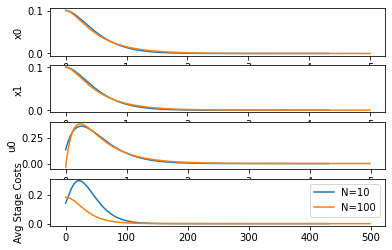

In [26]:
plot_comparisons(trajectories, Q, R)

We observe that $N=10$ has the lowest cost trajectory cost! This is unexpected. One would expect that the longer trajectory horizon would result in a closer approximation to the infinite horizon case, and yield a lower cost! The only thing I can think of is that the optimizer (IPOPT) solves the optimization problem less accurately for larger optimization problems.

Lets check a couple more horizons around $N=10$.

In [27]:
N = 6
print("Starting N=%s"%N)
name = "N=%s"%N
x, u, c = unconstrainted_mpc(F, N, x0, xg, Q, R, dt)
trajectories.append({'x' : x, 'u' : u, 'stage_costs' : c, 'name' : name, 'N' : N})
print("Done N=%s"%N)

N = 8
print("Starting N=%s"%N)
name = "N=%s"%N
x, u, c = unconstrainted_mpc(F, N, x0, xg, Q, R, dt)
trajectories.append({'x' : x, 'u' : u, 'stage_costs' : c, 'name' : name, 'N' : N})
print("Done N=%s"%N)

N = 12
print("Starting N=%s"%N)
name = "N=%s"%N
x, u, c = unconstrainted_mpc(F, N, x0, xg, Q, R, dt)
trajectories.append({'x' : x, 'u' : u, 'stage_costs' : c, 'name' : name, 'N' : N})
print("Done N=%s"%N)

N = 14
print("Starting N=%s"%N)
name = "N=%s"%N
x, u, c = unconstrainted_mpc(F, N, x0, xg, Q, R, dt)
trajectories.append({'x' : x, 'u' : u, 'stage_costs' : c, 'name' : name, 'N' : N})
print("Done N=%s"%N)

N = 16
print("Starting N=%s"%N)
name = "N=%s"%N
x, u, c = unconstrainted_mpc(F, N, x0, xg, Q, R, dt)
trajectories.append({'x' : x, 'u' : u, 'stage_costs' : c, 'name' : name, 'N' : N})
print("Done N=%s"%N)

Starting N=6
Done N=6
Starting N=8
Done N=8
Starting N=12
Done N=12
Starting N=14
Done N=14
Starting N=16
Done N=16


N=10 Total cost: 19.419505874305436
N=100 Total cost: 19.07497275581222
N=6 Total cost: 22.633079552927242
N=8 Total cost: 19.857811248065666
N=12 Total cost: 20.088869532928168
N=14 Total cost: 21.347431896339614
N=16 Total cost: 22.888185086742194


<ipython-input-11-12ce91688f10>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(subplot_id + j)
<ipython-input-11-12ce91688f10>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(subplot_id + j)
<ipython-input-11-12ce91688f10>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

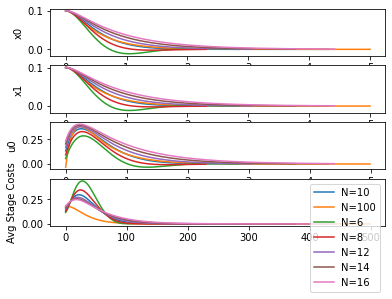

In [28]:
plot_comparisons(trajectories, Q, R)

There seems to exists a minimum around $N=10$. That is very odd...

## Distance from origin
Here we will explore how the solution changes as we start further and further away from the equilibrium. First, we will increase the position.

In [31]:

trajectories = []

x0s = [0.1, 0.3, 0.5, 1.0, 1.5]
for x00 in x0s:
    N = 10
    x0 = np.array([x00, 0])
    name = "x0=%s"%x00
    print("Starting %s"%name)
    x, u, c = unconstrainted_mpc(F, N, x0, xg, Q, R, dt, tol=tol, MAX_STEPS=MAX_STEPS)
    trajectories.append({'x' : x, 'u' : u, 'stage_costs' : c, 'name' : name, 'N' : N})
    print("Done %s"%name)



Starting x0=0.1
Done x0=0.1
Starting x0=0.5
Done x0=0.5
Starting x0=0.5
Done x0=0.5
Starting x0=1.0
Done x0=1.0
Starting x0=1.5
Done x0=1.5


x0=0.1 Total cost: 19.419505874305436
x0=0.5 Total cost: 479.67166661794056
x0=0.5 Total cost: 479.67166661794056
x0=1.0 Total cost: 1851.3346360780645
x0=1.5 Total cost: 3955.3523387594732


<ipython-input-11-12ce91688f10>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(subplot_id + j)
<ipython-input-11-12ce91688f10>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(subplot_id + j)
<ipython-input-11-12ce91688f10>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

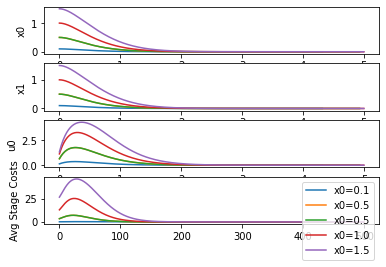

In [32]:
plot_comparisons(trajectories, Q, R)

I'll be honest, some of these were not supposed to work.... Notice, however, how much higher the control input peak is for the cases further away from the origin. Generally, the maximum control inputs are limited in the real world setting by what the motor at the pivot point can output. We will explore how to handle input and state constraints in the next tutorial.

Let us also see how different initial rates affect the performance

In [36]:
trajectories = []

x1s = [0.1, 0.3, 0.5, 1.0, 1.5]
for x11 in x1s:
    N = 10
    x0 = np.array([0.5, x11])
    name = "x1=%s"%x11
    print("Starting %s"%name)
    x, u, c = unconstrainted_mpc(F, N, x0, xg, Q, R, dt, tol=tol, MAX_STEPS=MAX_STEPS)
    trajectories.append({'x' : x, 'u' : u, 'stage_costs' : c, 'name' : name, 'N' : N})
    print("Done %s"%name)

Starting x1=0.1
Done x1=0.1
Starting x1=0.3
Done x1=0.3
Starting x1=0.5
Done x1=0.5
Starting x1=1.0
Done x1=1.0
Starting x1=1.5
Done x1=1.5


x1=0.1 Total cost: 486.32940626293924
x1=0.3 Total cost: 507.3073731629281
x1=0.5 Total cost: 538.5008933330867
x1=1.0 Total cost: 661.2030583742592
x1=1.5 Total cost: 847.8658938569581


<ipython-input-11-12ce91688f10>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(subplot_id + j)
<ipython-input-11-12ce91688f10>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(subplot_id + j)
<ipython-input-11-12ce91688f10>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

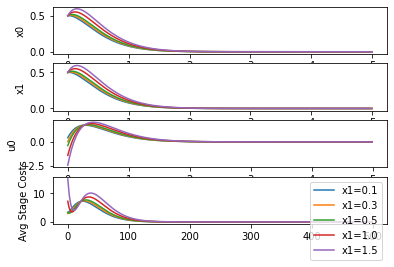

In [37]:
plot_comparisons(trajectories, Q, R)

With the increasing initial velocity, the initial inputs are almost always used to try and slow the system down.